# Global Power Plant Database Project

In [107]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVR
import pickle
import os
import joblib
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv("global-power-plant-database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(908, 25)

We have 908 rows and 25 columns in data

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [9]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [11]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [12]:
df['year_of_capacity_data'].nunique()

1

In [13]:
df['name'].nunique()

908

In [14]:
df.drop(['name','url'],axis=1,inplace=True)

In [15]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [16]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [17]:
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [18]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [19]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [20]:
df['source'].nunique()

191

In [21]:
df['geolocation_source'].nunique()

3

In [22]:
df['country'].nunique()

1

In [23]:
df['country_long'].nunique()

1

In [24]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

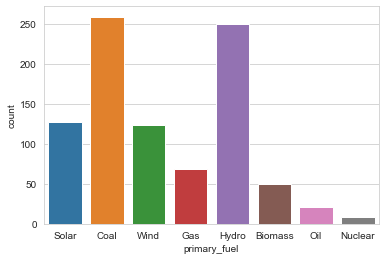

In [26]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [27]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,60.000000,60.000000,60.000,60.000000,60.000000
1,98.0,24.7663,74.6090,Coal,60.0,Ultratech Cement ltd,WRI,60.000000,60.000000,60.000,60.000000,60.000000
2,39.2,21.9038,69.3732,Wind,60.0,CDM,WRI,60.000000,60.000000,60.000,60.000000,60.000000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [28]:
dfcorr=df.corr()

<AxesSubplot:>

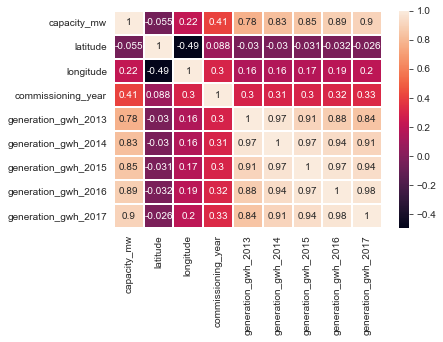

In [29]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

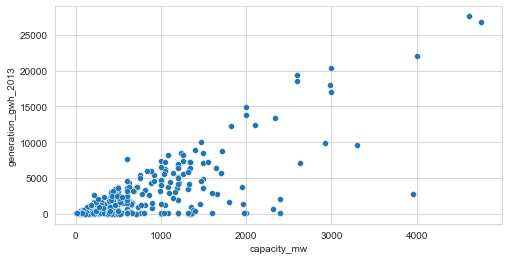

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

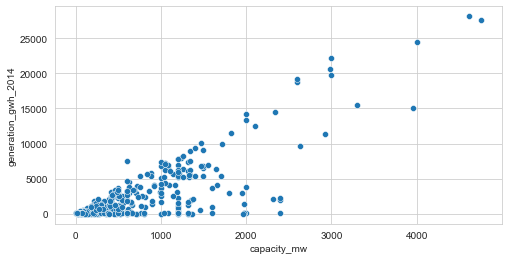

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

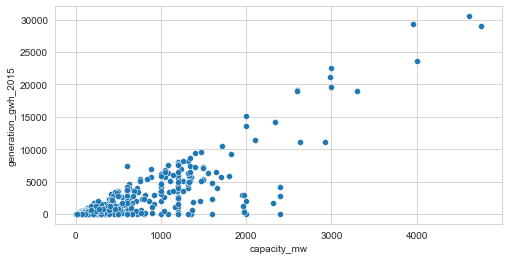

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

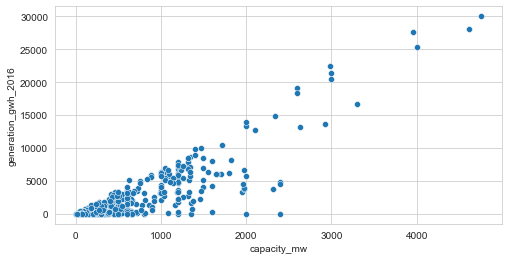

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

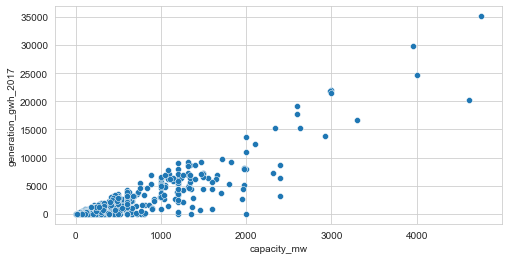

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

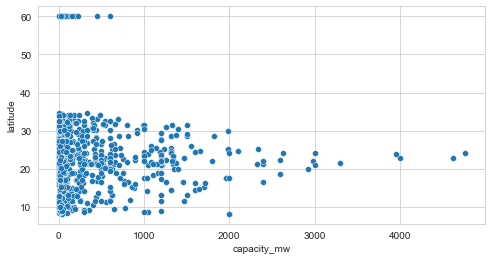

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

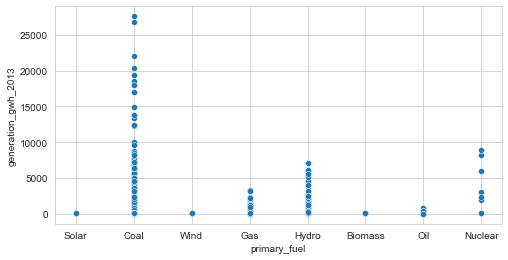

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

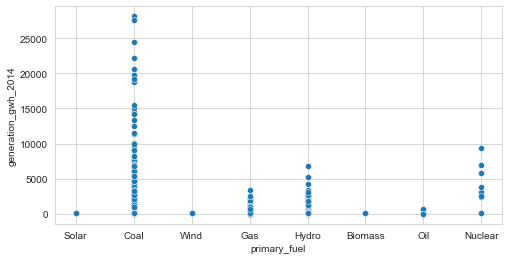

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

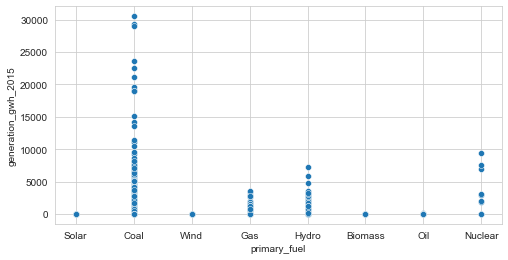

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

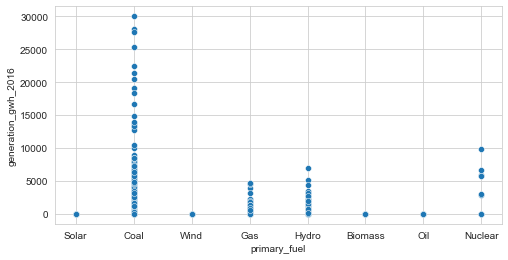

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

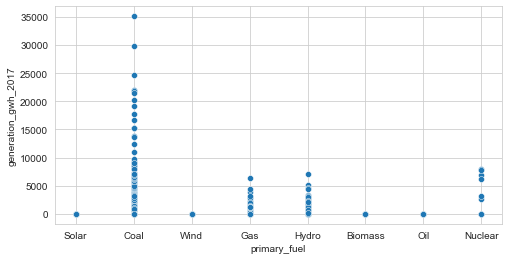

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

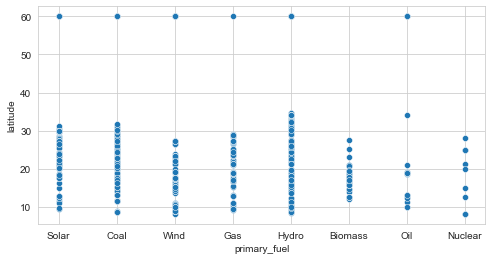

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

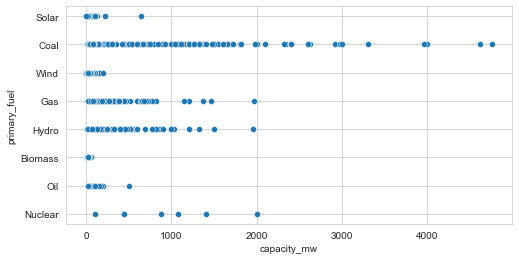

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

Coal is on Max Electrical generating capacity in Megawatts

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [45]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [46]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [47]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [48]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    int32  
 6   geolocation_source   908 non-null    int32  
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.6 KB


# Outliers Removal

# zscore

In [50]:
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881], dtype=int64), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [51]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (908, 12)
Shape of the dataframe after removing outliers:  (885, 12)
Percentage of data loss post outlier removal:  2.5330396475770924


In [52]:
 # reassigning the changed dataframe name to our original dataframe name
df=df1.copy()

In [53]:
df.shape

(885, 12)

# Skewness Handling

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

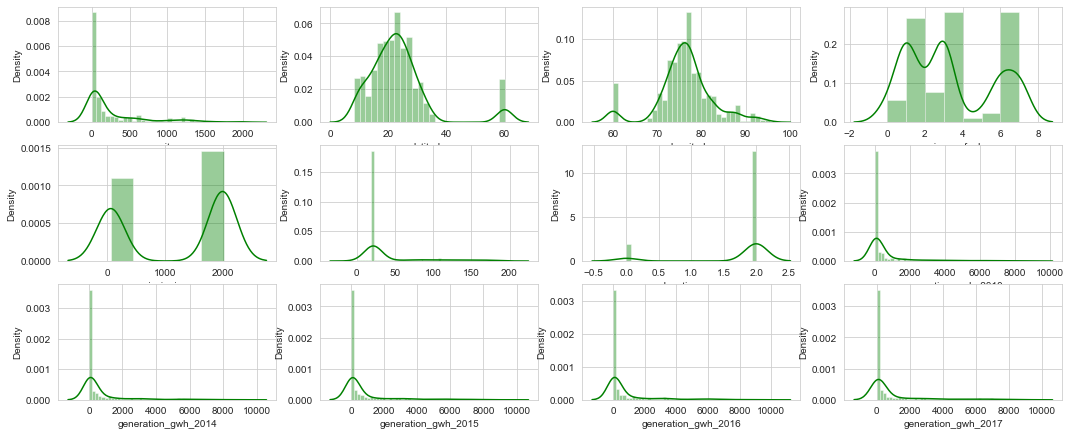

In [54]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [55]:
df.skew()

capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

skewness more than+/- 0.5 will we treated





object columns will no be treated

In [59]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.skew()

capacity_mw           -0.024446
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013   -0.333653
generation_gwh_2014   -0.275178
generation_gwh_2015   -0.258690
generation_gwh_2016   -0.248297
generation_gwh_2017   -0.229956
dtype: float64

First taking 'capacity_mw' as target creating Regression model

# Dividing Data into X and Y

In [60]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [61]:
x.shape

(885, 11)

In [62]:
y.shape

(885,)

# Scaling X values

In [65]:
sc=MinMaxScaler()
x=sc.fit_transform(x)
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [66]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.290048,0.464901,0.466182,0.564383,0.233637,0.863277,0.620486,0.595989,0.595707,0.593126,0.590408
std,0.204202,0.173085,0.326078,0.489898,0.237158,0.342100,0.179336,0.193143,0.196778,0.199455,0.206856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169119,0.388333,0.142857,0.000000,0.115789,1.000000,0.539975,0.511500,0.509888,0.502913,0.496622
50%,0.269591,0.463212,0.428571,0.978039,0.115789,1.000000,0.539975,0.511500,0.509888,0.502913,0.496622
75%,0.359508,0.539802,0.857143,0.991828,0.184211,1.000000,0.739237,0.728194,0.730465,0.727195,0.729361
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
pd.DataFrame(x).describe().T

,count,mean,std,min,25%,50%,75%,max
0,885.0,0.290048,0.204202,0.0,0.169119,0.269591,0.359508,1.0
1,885.0,0.464901,0.173085,0.0,0.388333,0.463212,0.539802,1.0
2,885.0,0.466182,0.326078,0.0,0.142857,0.428571,0.857143,1.0
3,885.0,0.564383,0.489898,0.0,0.000000,0.978039,0.991828,1.0
4,885.0,0.233637,0.237158,0.0,0.115789,0.115789,0.184211,1.0
5,885.0,0.863277,0.342100,0.0,1.000000,1.000000,1.000000,1.0
6,885.0,0.620486,0.179336,0.0,0.539975,0.539975,0.739237,1.0
7,885.0,0.595989,0.193143,0.0,0.511500,0.511500,0.728194,1.0
8,885.0,0.595707,0.196778,0.0,0.509888,0.509888,0.730465,1.0
9,885.0,0.593126,0.199455,0.0,0.502913,0.502913,0.727195,1.0


Data have been scalled


# MODEL BUILDING:

# Linear Regression

CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [69]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.5916398460767198
At random state 0, The test accuracy is: 0.6067472744040956


At random state 1, The training accuracy is: 0.595831264906934
At random state 1, The test accuracy is: 0.5902792362368616


At random state 2, The training accuracy is: 0.6230851576998857
At random state 2, The test accuracy is: 0.455309680801268


At random state 3, The training accuracy is: 0.5993958141620693
At random state 3, The test accuracy is: 0.5741639350532954


At random state 4, The training accuracy is: 0.5966348616332771
At random state 4, The test accuracy is: 0.5821800069532042


At random state 5, The training accuracy is: 0.6084656248534466
At random state 5, The test accuracy is: 0.5282793360143401


At random state 6, The training accuracy is: 0.6052198009357237
At random state 6, The test accuracy is: 0.5323798619335085


At random state 7, The training accuracy is: 0.6043699400184532
At random state 7, The test accuracy is: 0.5415065893311

random state=95 giving highest accuracy, choosing that as random state

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [73]:
x_train.shape

(646, 11)

In [74]:
x_test.shape

(239, 11)

In [75]:
y_train.shape

(646,)

In [76]:
y_test.shape

(239,)

In [77]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.574144636759164


In [78]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.3799030465481559
MAE: 0.49338832599457755
r2_score: 0.32973084853724277


# Ridge

In [80]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.5740353226550512


In [81]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.379740766250214
MAE: 0.4944798563756653
r2_score: 0.3215842068572923


# SVR

# SVR(kernel='linear')

In [83]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5300836331191563


In [84]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.40275697770638846
MAE: 0.4515187073196309
r2_score: 0.44806612987796723


# SVR(kernel='poly')

In [85]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.7793971501061452


In [86]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.2136110647630546
MAE: 0.33326737997637473
r2_score: 0.7454322133249576


# (kernel='rbf')

In [87]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.7780889926197065


In [88]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.1934475481718264
MAE: 0.32638525825326936
r2_score: 0.7397709318620503


# RandomForestRegressor

In [90]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9589101447820025


In [91]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.14774664672224072
MAE: 0.2787962181528813
r2_score: 0.8177247364063447


# DecisionTreeRegressor

In [93]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.990345627951066


In [94]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.24759156115135234
MAE: 0.3534177531780716
r2_score: 0.7494931343144411


# GradientBoostingRegressor

In [96]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8777272596583524


In [97]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.15970924481058094
MAE: 0.2992520965615942
r2_score: 0.800081498310272


# Cross Validation

In [98]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.418087, 0.064830
R    : 0.416718, 0.064420
svr    : 0.464938, 0.079097
svr_p    : 0.253838, 0.056293
svr_r    : 0.234809, 0.066149
RF    : 0.214386, 0.061669
DTR    : 0.309817, 0.093271
GBR    : 0.204574, 0.066203


 -->Accourding to all metrics score selecting the GradientBoostingRegressoras for GridSeachCV

# HYPER PARAMETER TUNING:

GridSearchCV

# With GradientBoostingRegressor


In [100]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [101]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [102]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


In [103]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [104]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.15088708860976066
MAE: 0.28280070966031357
r2_score: 0.8165927703090997


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

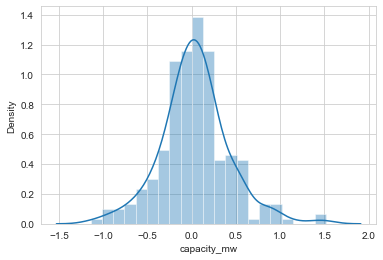

In [105]:
sns.distplot(GF_grid_pred-y_test)

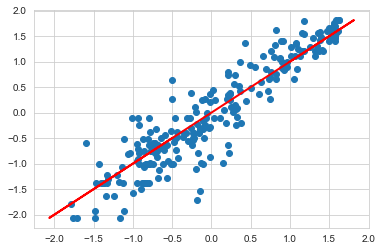

In [106]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# Choosing GradientBoostingRegressor as the best model

# TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL Dividing data into X and Y

In [109]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [110]:
x.shape

(885, 11)

In [111]:
y.shape

(885,)

# Spliting Train and Test data

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [113]:
x_train.shape

(646, 11)

In [114]:
x_test.shape

(239, 11)

In [115]:
y_train.shape

(646,)

In [116]:
y_test.shape

(239,)

# MODEL BUILDING:

In [144]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# LogisticRegression

In [117]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

cross validation score: 0.5288135593220339


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.5523012552301255
[[ 0  3  0  0  0  0  8  1]
 [ 0  8  0 41  0  0 15  4]
 [ 0  2  0 14  0  0  2  1]
 [ 0  4  0 64  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  2  0  0  3  0]
 [ 0  2  0  0  0  0 25  3]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.42      0.12      0.18        68
           2       0.00      0.00      0.00        19
           3       0.52      0.94      0.67        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.47      0.83      0.60        30
           7       0.80      1.00      0.89        35

    accuracy                           0.55       239
   macro avg       0.28      0.36      0.29       239
weighted avg       0.44      0.55      0.45       239

Training accuracy:: 0.5325077399380805
Test accuracy:: 0.5523012552301255


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

# DECISION TREE CLASSIFIER

In [122]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7864406779661017


In [123]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.803347280334728
[[11  1  0  0  0  0  0  0]
 [ 1 50  8  5  1  3  0  0]
 [ 0  3  8  7  0  1  0  0]
 [ 0  8  3 57  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 1  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.78      0.74      0.76        68
           2       0.38      0.42      0.40        19
           3       0.83      0.84      0.83        68
           4       0.00      0.00      0.00         2
           5       0.29      0.40      0.33         5
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        35

    accuracy                           0.80       239
   macro avg       0.64      0.66      0.65       239
weighted avg       0.81      0.80      0.81       239

Training accuracy:: 1.0
Test accuracy:: 0.803347280334728


# KNeighborsClassifier

In [124]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7265536723163841


In [125]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7364016736401674
[[ 8  2  1  0  0  0  1  0]
 [ 2 43  5 12  0  0  5  1]
 [ 1  8  5  4  0  0  0  1]
 [ 0  1  1 64  0  2  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  1  0  2  0  0  1  0]
 [ 5  3  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.74      0.63      0.68        68
           2       0.38      0.26      0.31        19
           3       0.77      0.94      0.85        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.75      0.70      0.72        30
           7       0.92      1.00      0.96        35

    accuracy                           0.74       239
   macro avg       0.50      0.53      0.51       239
weighted avg       0.71      0.74      0.72       239

Training accuracy:: 0.8095975232198143
Test accuracy:: 0.7364016736401674


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandomForestClassifier

In [126]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8474576271186441


In [127]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8493723849372385
[[11  1  0  0  0  0  0  0]
 [ 6 53  0  7  0  2  0  0]
 [ 0  5  6  6  0  2  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.83      0.78      0.80        68
           2       0.86      0.32      0.46        19
           3       0.83      0.96      0.89        68
           4       0.00      0.00      0.00         2
           5       0.38      0.60      0.46         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.85       239
   macro avg       0.69      0.70      0.67       239
weighted avg       0.85      0.85      0.84       239

Training accuracy:: 1.0
Test accuracy:: 0.8493723849372385


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ENSEMBLE TECHNIQUES


# 1. ADA BOOST CLASSIFIER

In [128]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


cross validation score for Ada boost: 0.5458503575076609


In [129]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.41841004184100417
[[ 0  0  0 12  0  0  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  0  0 19  0  0  0  0]
 [ 0  0  0 68  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  1  0  0 29  0]
 [ 0 35  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.08      0.04      0.06        68
           2       0.00      0.00      0.00        19
           3       0.40      1.00      0.57        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.98        30
           7       0.00      0.00      0.00        35

    accuracy                           0.42       239
   macro avg       0.18      0.25      0.20       239
weighted avg       0.26      0.42      0.30       239

Training accuracy:: 0.44272445820433437
Test accuracy:: 0.41841004184100417


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2. BAGGING CLASSIFIER

In [130]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


cross validation score for BAGGING Classifier: 0.8327247191011236


In [131]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8200836820083682
[[11  1  0  0  0  0  0  0]
 [ 6 49  5  7  0  1  0  0]
 [ 0  2  6  9  0  2  0  0]
 [ 0  5  0 63  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  1  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.82      0.72      0.77        68
           2       0.50      0.32      0.39        19
           3       0.80      0.93      0.86        68
           4       0.00      0.00      0.00         2
           5       0.43      0.60      0.50         5
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        35

    accuracy                           0.82       239
   macro avg       0.65      0.68      0.66       239
weighted avg       0.81      0.82      0.81       239

Training accuracy:: 0.9938080495356038
Test accuracy:: 0.8200836820083682


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Gradient Boosting classifier



In [132]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


cross validation score for Gradient Boosting Classifier: 0.8530643513789581


In [133]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8368200836820083
[[12  0  0  0  0  0  0  0]
 [ 5 51  2  7  2  1  0  0]
 [ 0  5  9  3  0  2  0  0]
 [ 0  5  1 62  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  3  0  0  1  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.81      0.75      0.78        68
           2       0.60      0.47      0.53        19
           3       0.86      0.91      0.89        68
           4       0.00      0.00      0.00         2
           5       0.20      0.20      0.20         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.84       239
   macro avg       0.65      0.67      0.65       239
weighted avg       0.83      0.84      0.83       239

Training accuracy:: 1.0
Test accuracy:: 0.8368200836820083


# HYPER PARAMETER TUNING:

In [134]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [135]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [136]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8284518828451883


In [137]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

# Model training with best parameters

In [138]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [139]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [140]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8284518828451883


# Report of RandomForestClassifier

In [141]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.84      0.75      0.79        68
           2       0.80      0.21      0.33        19
           3       0.78      0.96      0.86        68
           4       0.00      0.00      0.00         2
           5       0.29      0.40      0.33         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.83       239
   macro avg       0.66      0.65      0.63       239
weighted avg       0.83      0.83      0.81       239



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Temperature Forecast Project using ML

In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pickle

In [3]:
df1=pd.read_csv("temperature.csv")

In [4]:
df1.shape

(7752, 25)

In [5]:
df1.info

<bound method DataFrame.info of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.

In [6]:
df1.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [7]:
df1.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df1.drop("Date",axis=1,inplace=True)

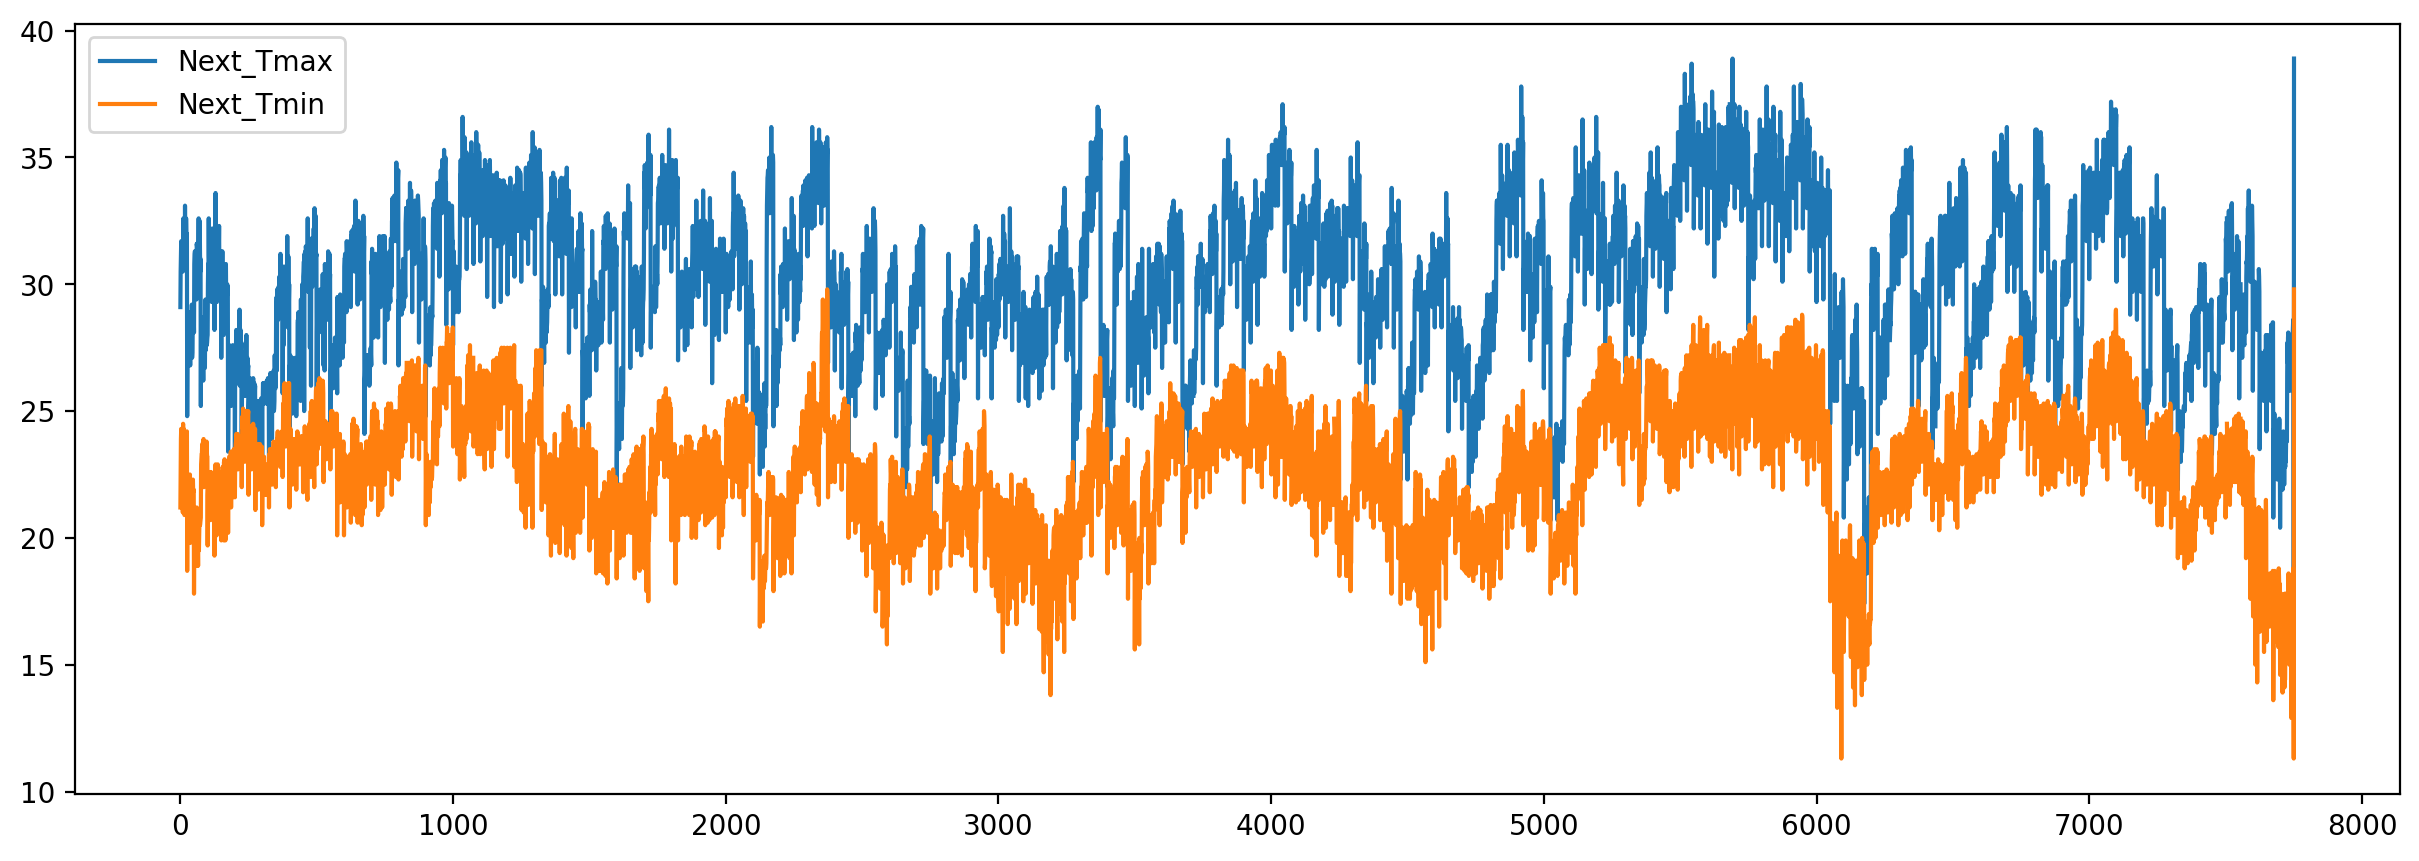

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=200)
plt.plot(df1["Next_Tmax"], label="Next_Tmax")
plt.plot(df1["Next_Tmin"],label = "Next_Tmin")
plt.legend()
plt.show()

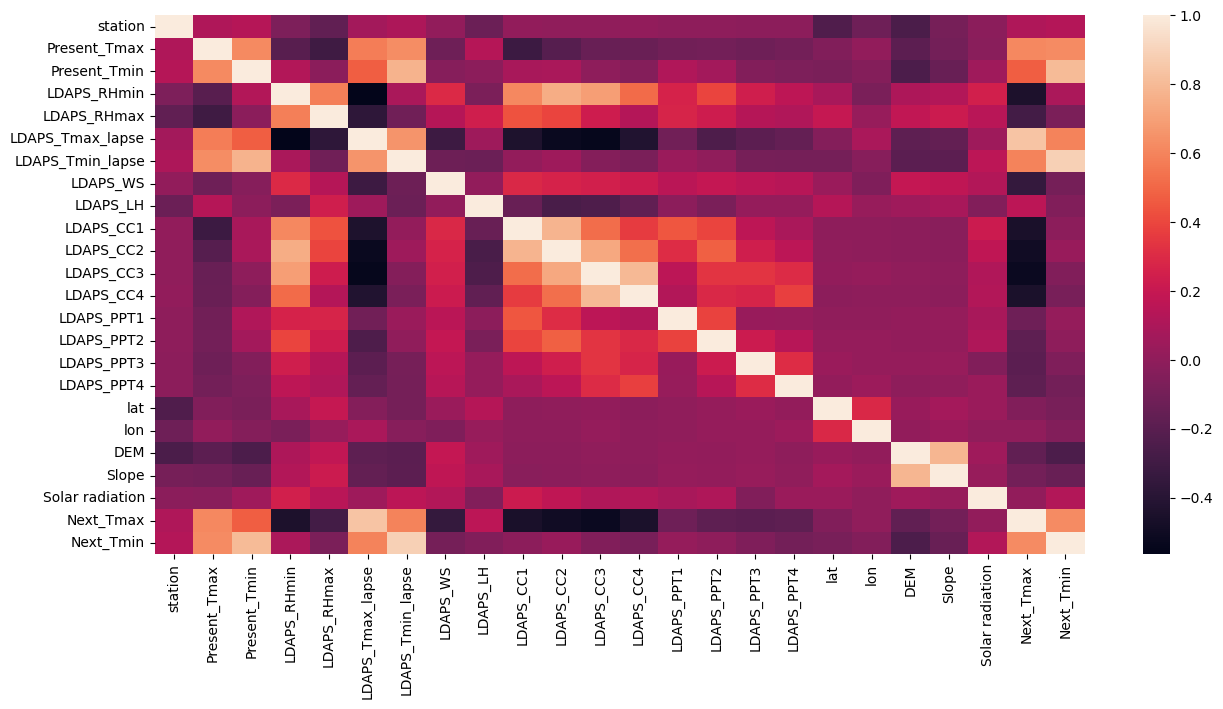

In [11]:
cor = df1.corr()
plt.figure(figsize=(15,7),dpi=100)
sns.heatmap(cor)
plt.show()

In [12]:
df1 = df1.dropna()
df1.shape

(7588, 24)

In [15]:
df1.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [16]:
train,test = train_test_split(df1,test_size=0.2,random_state=0)

In [17]:
test.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1762,13.0,29.5,24.0,49.240719,89.921028,34.389545,24.601625,5.221017,88.933403,0.568819,...,0.000000,3.412338,0.769094,37.5776,127.083,59.8324,2.6865,5800.494629,33.6,25.4
7084,10.0,32.6,25.3,41.582893,81.946777,35.240291,26.001706,6.759760,82.979974,0.049609,...,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5297.417969,35.4,24.5
6132,8.0,24.1,20.4,39.681465,77.433571,26.909984,17.867995,10.090204,69.809657,0.297910,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,4478.937012,27.1,19.2
1172,23.0,33.4,26.9,55.953552,91.107788,31.923643,27.142155,6.661125,89.106326,0.462394,...,0.354516,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,4987.615723,34.1,27.0
298,24.0,25.6,24.6,87.433739,94.444557,25.066071,22.826700,8.913279,43.476780,0.817220,...,3.583352,5.172169,0.988621,37.5237,126.909,17.2956,0.2223,5758.557617,24.7,23.5


In [35]:
df1.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [19]:
def Xy(df):
    X = df.drop(["Next_Tmax","Next_Tmin"],axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]
    
    return X,y_max,y_min

In [20]:
X_train, y_max_train, y_min_train = Xy(train)
X_test, y_max_test, y_min_test = Xy(test)

In [21]:
y_min_train.head()

1610    22.1
4048    26.9
1968    22.4
6937    24.8
2607    22.4
Name: Next_Tmin, dtype: float64

In [22]:
max_model = LinearRegression()
max_model.fit(X_train, y_max_train)

LinearRegression()

In [23]:
y_max_pred = max_model.predict(X_test)
max_model.score(X_test,y_max_test)

0.7922200591607389

In [24]:
min_model = LinearRegression()
min_model.fit(X_train, y_min_train)

LinearRegression()

In [25]:
y_min_pred = min_model.predict(X_test)
min_model.score(X_test,y_min_test)

0.8348312312471129

# Loan Application Status Prediction

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [28]:
df3=pd.read_csv("loan_prediction.csv")

In [29]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
df3.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
df3.shape

(614, 13)

In [34]:
df3.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [40]:
df3['Gender'].fillna(df3['Gender'].mode()[0], inplace=True)
df3['Married'].fillna(df3['Married'].mode()[0], inplace=True)
df3['Dependents'].fillna(df3['Dependents'].mode()[0], inplace=True)
df3['Self_Employed'].fillna(df3['Self_Employed'].mode()[0], inplace=True)
df3['Loan_Amount_Term'].fillna(df3['Loan_Amount_Term'].mode()[0], inplace=True)
df3['LoanAmount'].fillna(df3['LoanAmount'].mode()[0], inplace=True)
df3['Credit_History'].fillna(df3['Credit_History'].mode()[0], inplace=True)


In [41]:
df3.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
df3.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [45]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [47]:
df3['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [48]:
df3=df3.replace(to_replace='3+',value=4)

In [49]:
df3['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

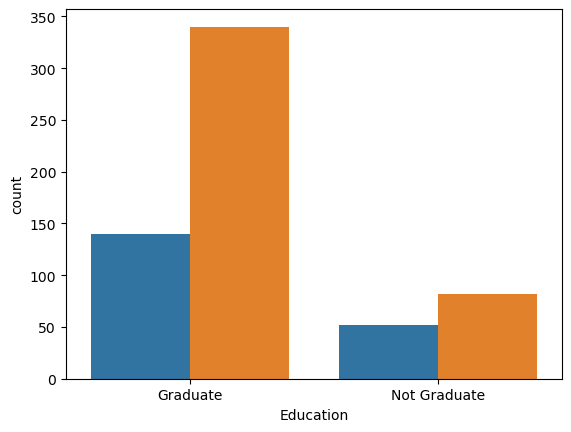

In [50]:
sns.countplot(x='Education',hue='Loan_Status',data=df3)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

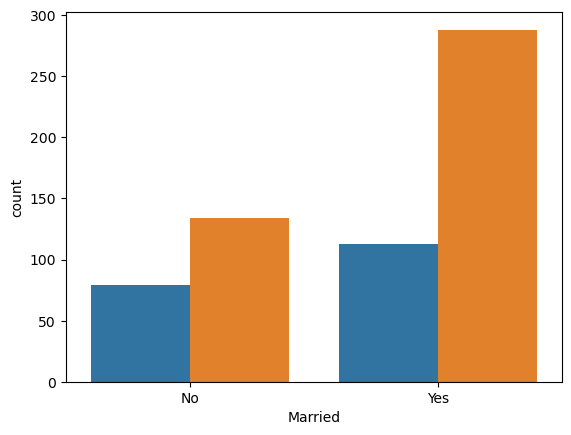

In [52]:
sns.countplot(x='Married',hue='Loan_Status',data=df3)

In [53]:
df3.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [54]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [55]:
X=df3.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [56]:
Y=df3['Loan_Status']

In [57]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [58]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [60]:
print(X_train.shape,X_test.shape)

(552, 11) (62, 11)


In [61]:
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

In [68]:
X_train_pred=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)

In [69]:
print(training_data_accuracy)

0.802536231884058


In [70]:
X_test_pred=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)

In [71]:
print(test_data_accuracy)

0.8064516129032258
